# Gold Price Prediction

In [68]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Data Collection and Processing

In [71]:
# loading the dataset

gold_data = pd.read_csv('gold_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [73]:
# getting some basic informations about the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [75]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [77]:
# getting the statistical measures of the data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Corelation

In [80]:
gold_data = gold_data.drop('Date',axis=1)
correlation = gold_data.corr()

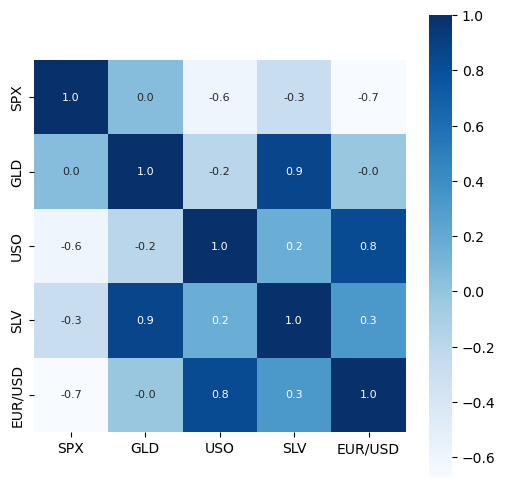

In [82]:
# constructing a heatmap to understand the correlatiom

plt.figure(figsize = (6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [84]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


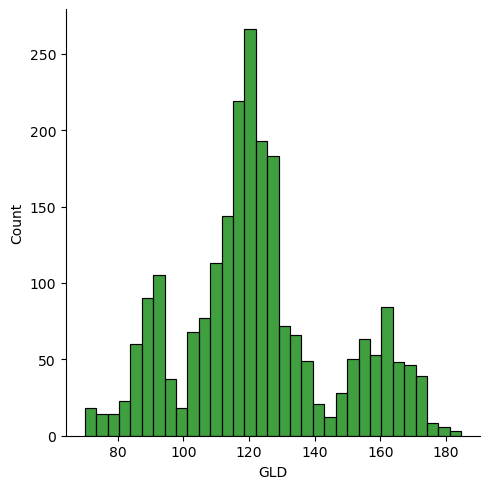

In [138]:
# checking the distribution of the GLD Price
sns.displot(gold_data['GLD'],color='green')
plt.show()

#### Splitting the Features and Target

In [89]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [91]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [93]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#### Splitting into Training data and Test Data

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

#### Model Training: Random Forest Regressor

In [99]:
regressor = RandomForestRegressor(n_estimators=100)

In [101]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

#### Model Evaluation

In [104]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [106]:
print(test_data_prediction)

[168.14269873  81.61809993 115.95279999 127.52910022 120.604901
 154.84089792 150.36089854 126.20760065 117.50109867 126.04670067
 116.54890108 172.25620115 141.43789863 167.99179894 115.22959982
 117.67610046 137.97300327 169.72470007 159.72660357 158.27739901
 155.13680003 125.23370037 176.5597994  156.70720279 125.24720042
  93.84569956  76.5392003  120.48829959 119.02129886 167.52179859
  87.99170099 125.14109981  91.20510079 117.69810022 121.12469913
 136.51900104 115.41990146 114.97370047 149.45309943 106.97750086
 104.57790256  87.00019771 126.62400048 117.88899952 153.44309907
 119.70419996 108.26260001 107.86889827  93.1997004  127.00689812
  74.77400026 113.68999958 121.36130033 111.31419923 118.89629887
 120.52369941 158.54530022 166.12280183 147.00139693  85.91169847
  94.38730037  86.85659895  90.61940009 118.91100084 126.46580067
 127.59370019 169.13690006 122.25019912 117.48049883  98.14029966
 168.09060138 143.1697988  131.84490215 121.23200226 121.28609961
 119.7393005

In [108]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.988921806449656


#### Compare the Actual Values and Predicted Values in a Plot

In [111]:
Y_test = list(Y_test)

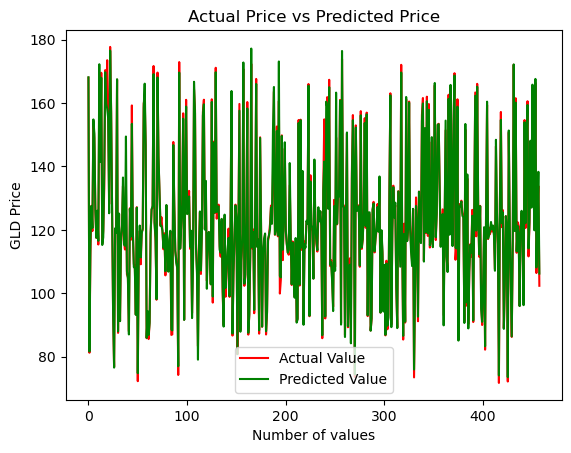

In [113]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [123]:
regressor.score(X_train, Y_train)

0.9984881608128249

### *Result: We got 99.8% accuracy.*